In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0587dfca0>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9892646729491633

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0587dfca0>,
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9892646729491633

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0587dfca0>,
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9892646729491633

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0587dfca0>,
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9900832323511533

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0587dfca0>,
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9900832323511533

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0587dfca0>,
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9900832323511533

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([4.16167307, 4.21863484, 3.98869205, 3.9905479 , 4.021456  ]),
 'score_time': array([0.00355291, 0.00342917, 0.00335217, 0.00475907, 0.00347304]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd063280b50>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd063280e50>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([5.00024295, 5.02324772, 5.01335192, 4.99002099, 5.02888393]),
 'score_time': array([0.00334907, 0.00338411, 0.00332689, 0.00336003, 0.00332689]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd06368f280>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd06368f3a0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([5.00452209, 5.08011484, 5.02102184, 4.98772502, 5.03083587]),
 'score_time': array([0.00328493, 0.00346327, 0.00336909, 0.00328302, 0.00333333]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd069393ee0>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd063276070>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 Gradient

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([5.01707101, 5.07632399, 5.07473302, 5.03811598, 5.06550312]),
 'score_time': array([0.00336576, 0.00338197, 0.00339317, 0.003371  , 0.0033989 ]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd069589eb0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd069589970>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd069589f40>,
                    passth

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([5.05767393, 5.07600689, 5.08181596, 5.32224798, 5.17426395]),
 'score_time': array([0.00335526, 0.00334597, 0.00335312, 0.00336313, 0.00337791]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd06380a580>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0695baf40>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0638382b0>,
                    passth

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([5.07949901, 5.07603574, 5.08284807, 5.04011297, 5.08144689]),
 'score_time': array([0.00339413, 0.0034349 , 0.00331497, 0.00330114, 0.00338817]),
 'estimator': [StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd05881a6a0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0631ec2e0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd0695adb80>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                          

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

In [38]:
cat

,fit_time,score_time,test_score
0,5.737823,0.006951,0.920566
1,5.827228,0.011306,0.899820
2,5.758824,0.010446,0.938045
3,5.613283,0.008177,0.933383
4,7.711956,0.020515,0.949361
5,5.798973,0.009121,0.934502
6,6.797403,0.006502,0.944618
7,5.744284,0.009242,0.924652
8,5.323502,0.006864,0.947610
9,5.222113,0.007929,0.883656


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,1.044072,0.005864,0.914384
1,1.117467,0.002685,0.831491
2,1.097708,0.003217,0.917112
3,1.048826,0.005588,0.910775
4,1.062859,0.004541,0.928567
5,1.087709,0.002916,0.909586
6,1.078083,0.005795,0.926628
7,1.074189,0.002534,0.895272
8,0.892626,0.002342,0.928754
9,0.921315,0.002259,0.836306


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.914384
1,0.831491
2,0.917112
3,0.910775
4,0.928567
5,0.909586
6,0.926628
7,0.895272
8,0.928754
9,0.836306


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,13.832425,0.009398,0.926582
1,10.688558,0.005711,0.901820
2,11.477638,0.011161,0.935504
3,14.299819,0.006309,0.925199
4,13.903669,0.009558,0.944707
5,14.047924,0.008994,0.924770
6,14.035629,0.007113,0.939281
7,10.626908,0.012136,0.921177
8,11.748026,0.014530,0.945114
9,11.682999,0.019230,0.880601


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.926582
1,0.901820
2,0.935504
3,0.925199
4,0.944707
5,0.924770
6,0.939281
7,0.921177
8,0.945114
9,0.880601


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,13.240455,0.007854,0.926582
1,10.831193,0.010118,0.901820
2,13.064884,0.015706,0.935504
3,10.724653,0.009413,0.925199
4,13.292721,0.006273,0.944707
5,13.182706,0.011276,0.924770
6,11.787541,0.008298,0.939281
7,10.705130,0.005882,0.921177
8,12.574672,0.015679,0.945114
9,12.410238,0.017579,0.880601


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.926582
1,0.901820
2,0.935504
3,0.925199
4,0.944707
5,0.924770
6,0.939281
7,0.921177
8,0.945114
9,0.880601


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,12.674028,0.009071,0.926582
1,14.299739,0.008246,0.901820
2,11.475792,0.005220,0.935504
3,13.074806,0.015288,0.925199
4,12.858774,0.008094,0.944707
5,11.412479,0.005916,0.924770
6,12.985439,0.009668,0.939281
7,11.345622,0.009229,0.921177
8,12.571815,0.017804,0.945114
9,10.158233,0.008805,0.880601


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.926582
1,0.901820
2,0.935504
3,0.925199
4,0.944707
5,0.924770
6,0.939281
7,0.921177
8,0.945114
9,0.880601


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,11.365186,0.009291,0.918441
1,15.010017,0.017583,0.894153
2,10.418552,0.003961,0.931975
3,15.193760,0.007333,0.919748
4,10.777093,0.005174,0.945851
5,15.120287,0.008706,0.924672
6,15.097443,0.009893,0.942337
7,10.338133,0.004161,0.928179
8,10.974019,0.006431,0.947352
9,10.899817,0.009030,0.889145


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.918441
1,0.894153
2,0.931975
3,0.919748
4,0.945851
5,0.924672
6,0.942337
7,0.928179
8,0.947352
9,0.889145


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,12.460786,0.026505,0.918441
1,14.249321,0.014497,0.894153
2,12.967173,0.008082,0.931975
3,12.410302,0.007226,0.919748
4,12.775671,0.027534,0.945851
5,12.543615,0.017491,0.924672
6,13.127685,0.015793,0.942337
7,12.351894,0.011425,0.928179
8,11.060667,0.004744,0.947352
9,10.946382,0.006118,0.889145


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.918441
1,0.894153
2,0.931975
3,0.919748
4,0.945851
5,0.924672
6,0.942337
7,0.928179
8,0.947352
9,0.889145


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,10.308277,0.007870,0.918441
1,14.594341,0.007959,0.894153
2,14.312282,0.012166,0.931975
3,14.707956,0.010684,0.919748
4,14.350938,0.018089,0.945851
5,14.332521,0.018811,0.924672
6,14.422224,0.017836,0.942337
7,13.814014,0.007764,0.928179
8,10.915904,0.018510,0.947352
9,10.725041,0.007630,0.889145


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.918441
1,0.894153
2,0.931975
3,0.919748
4,0.945851
5,0.924672
6,0.942337
7,0.928179
8,0.947352
9,0.889145


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.920566,0.914384,0.926582,0.926582,0.926582,0.918441,0.918441,0.918441
1,0.899820,0.831491,0.901820,0.901820,0.901820,0.894153,0.894153,0.894153
2,0.938045,0.917112,0.935504,0.935504,0.935504,0.931975,0.931975,0.931975
3,0.933383,0.910775,0.925199,0.925199,0.925199,0.919748,0.919748,0.919748
4,0.949361,0.928567,0.944707,0.944707,0.944707,0.945851,0.945851,0.945851
5,0.934502,0.909586,0.924770,0.924770,0.924770,0.924672,0.924672,0.924672
6,0.944618,0.926628,0.939281,0.939281,0.939281,0.942337,0.942337,0.942337
7,0.924652,0.895272,0.921177,0.921177,0.921177,0.928179,0.928179,0.928179
8,0.947610,0.928754,0.945114,0.945114,0.945114,0.947352,0.947352,0.947352
9,0.883656,0.836306,0.880601,0.880601,0.880601,0.889145,0.889145,0.889145


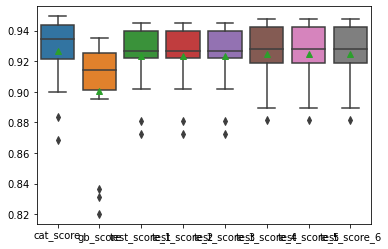

In [71]:
sns.boxplot(data=combo, showmeans=True);

In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.923726,0.923726,0.923726,0.924451,0.924451,0.924451
std,0.024378,0.038179,0.022409,0.022409,0.022409,0.021300,0.021300,0.021300
min,0.868666,0.820084,0.872596,0.872596,0.872596,0.881885,0.881885,0.881885
25%,0.921228,0.901359,0.921813,0.921813,0.921813,0.919094,0.919094,0.919094
50%,0.934502,0.914384,0.926582,0.926582,0.926582,0.928179,0.928179,0.928179
75%,0.943737,0.925660,0.939876,0.939876,0.939876,0.942592,0.942592,0.942592
max,0.949361,0.935113,0.945114,0.945114,0.945114,0.947352,0.947352,0.947352
